In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

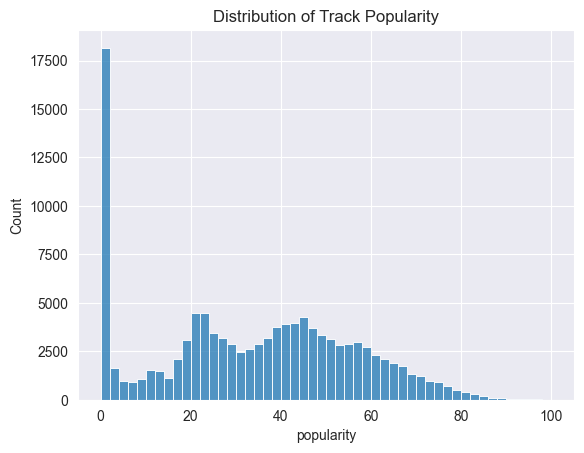

In [38]:
# Spotify Tracks Dataset - Explanatory Data Analysis

# Loading the dataset

data = pd.read_csv("../data/spotify_tracks.csv")
data.head()
data.info()


data.isnull().sum() # Checking for the missing values 
sns.histplot(data["popularity"], bins=50) # bins = nb of bars in the histo
plt.title("Distribution of Track Popularity") # Plotting the distribution of popularity of the tracks
plt.show()

# Data cleaning
data.drop_duplicates(subset = ["track_name", "artists"])

audio_features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
data = data.dropna(subset = audio_features)

#Selection and standardization of audio features
data = data.sample(n = 300, random_state  = 42).reset_index(drop = True)
X = data[audio_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Standardizing the audio features to have mean 0 and variance 1

# Similarity analysis!!
similarity_mtx = cosine_similarity(X_scaled) #ne fonctionne pas sans réduire, dataset énorme

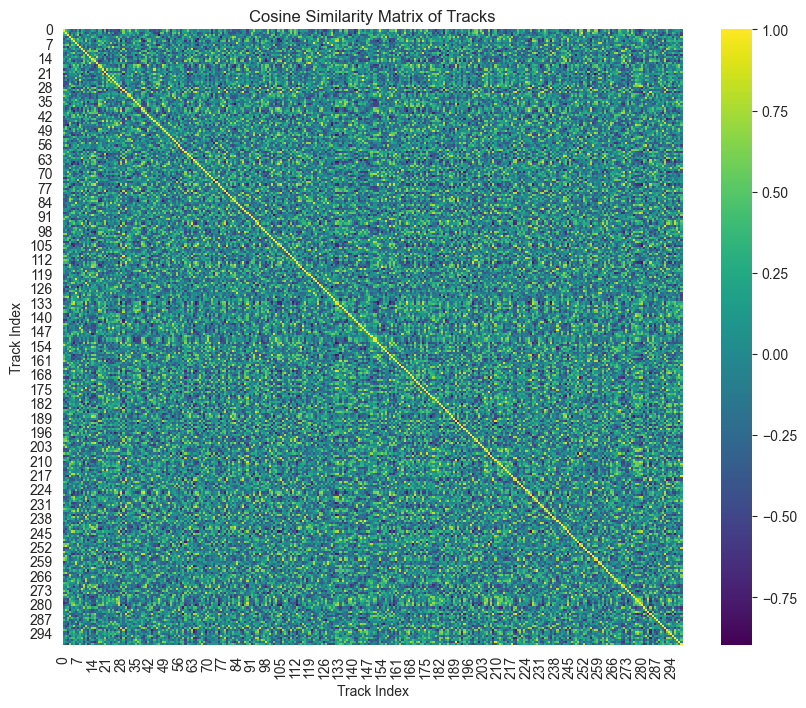

In [39]:
# Visualization of the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_mtx, cmap="viridis")
plt.title("Cosine Similarity Matrix of Tracks")
plt.xlabel("Track Index")
plt.ylabel("Track Index")
plt.show()

In [ ]:
# Recommendation system function based on similarity

def recommend_tracks(track_name, artists, data, similarity_mtx, top_n=5):
    